In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the master table

try:
    df = pd.read_csv('../data/master_table.csv')
    print("Data loaded successfully!")
    print(f"Rows: {len(df)}")
except FileNotFoundError:
    print("Error: 'master_table' not found.")

Data loaded successfully!
Rows: 108630


In [2]:
# Calculate Revenue per Product
product_revenue = df.groupby('product_id')['price'].sum().reset_index()
product_revenue.columns = ['product_id', 'total_revenue']

product_revenue = product_revenue.sort_values('total_revenue', ascending=False)

# Calculate Cumulative Metrics

# Total Revenue of the whole company
total_revenue = product_revenue['total_revenue'].sum()

# Cumulative Revenue (Running Total)
product_revenue['cumulative_revenue'] = product_revenue['total_revenue'].cumsum()

# Cumulative Percentage (0 to 100%)
product_revenue['cumulative_percentage'] = 100 * (product_revenue['cumulative_revenue'] / total_revenue)

print("Revenue Calculated. Top 5 Products:")
display(product_revenue.head())

Revenue Calculated. Top 5 Products:


,product_id,total_revenue,cumulative_revenue,cumulative_percentage
23118,bb50f2e236e5eea0100680137654686c,63560.00,63560.00,0.487263
13498,6cdd53843498f92890544667809f1595,53652.30,117212.30,0.898572
26508,d6160fb7873f184099d9bc95e30376af,45949.35,163161.65,1.250829
25952,d1c427060a0f73f6b889a5c7c61f2ac4,45620.56,208782.21,1.600565
18947,99a4788cb24856965c36a24e339b6058,42049.66,250831.87,1.922926


In [3]:
# Assign ABC Classes
def assign_classes(cumulative_percentage):
    if cumulative_percentage <= 80:
        return 'A'
    elif cumulative_percentage <= 95:
        return 'B'
    else:
        return 'C'
    
product_revenue['product_class'] = product_revenue['cumulative_percentage'].apply(assign_classes)

print("Classes Assigned.")
print(product_revenue['product_class'].value_counts())

Classes Assigned.
product_class
C    12530
B    10862
A     8227
Name: count, dtype: int64


--- ABC Analysis Summary ---


,product_class,product_id,total_revenue,revenue_share
0,A,8227,10435132.20,79.997752
1,B,10862,1956879.86,15.001822
2,C,12530,652269.66,5.000426


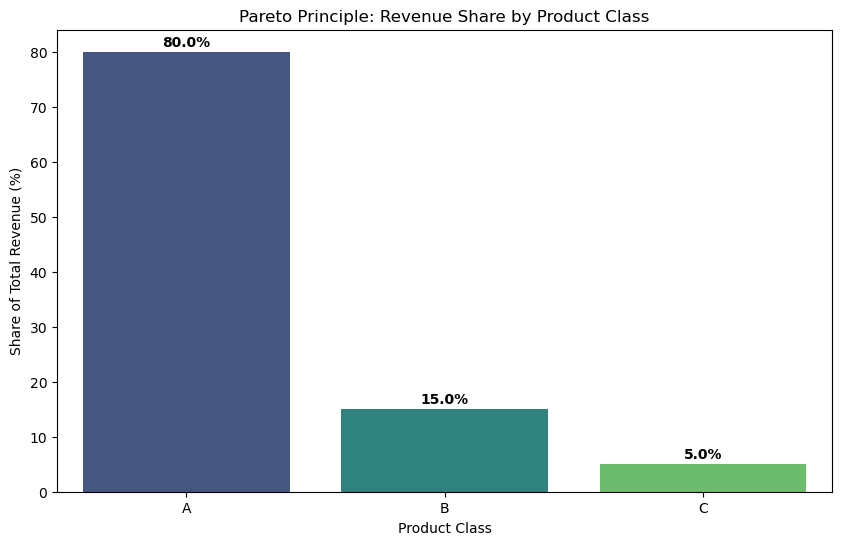

In [4]:
# Create summary table
summary = product_revenue.groupby('product_class').agg({
    'product_id': 'count',
    'total_revenue': 'sum'
}).reset_index()

#Calculate % of total revenue for the summary
summary['revenue_share'] = 100 * (summary['total_revenue'] / total_revenue)

print("--- ABC Analysis Summary ---")
display(summary)

# Plot Pareto chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary, 
    x='product_class', 
    y='revenue_share',
    hue='product_class',
    palette='viridis',
    legend=False)
plt.title('Pareto Principle: Revenue Share by Product Class')
plt.ylabel('Share of Total Revenue (%)')
plt.xlabel('Product Class')

# Add labels on top of bars
for index, row in summary.iterrows():
    plt.text(index, row.revenue_share + 1, f"{row.revenue_share:.1f}%", ha='center', fontweight='bold')

plt.show()